Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [25]:
library('tidymodels')
library('tidyr')
library(dplyr)

The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [26]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [27]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 4, 1, 3, 8, 1, 5, 3, 10, 3, 7, 1…
$ Glucose                  <dbl> 85, 89, 116, 115, 110, 103, 126, 99, 97, 117,…
$ BloodPressure            <dbl> 66, 66, 74, 0, 92, 30, 88, 84, 66, 92, 58, 78…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 38, 41, 0, 15, 0, 11, 31, 25…
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 83, 235, 0, 140, 0, 54, 0, 70…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 37.6, 43.3, 39.3, 35.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 0.191, 0.183, 0.7…
$ Age                      <dbl> 31, 21, 30, 29, 30, 33, 27, 50, 22, 38, 22, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

> generally your outcome variable should be a variable that has two outcomes since this is binary regression

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| BMI         | Body mass index (weight in kg/(height in m)^2) |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

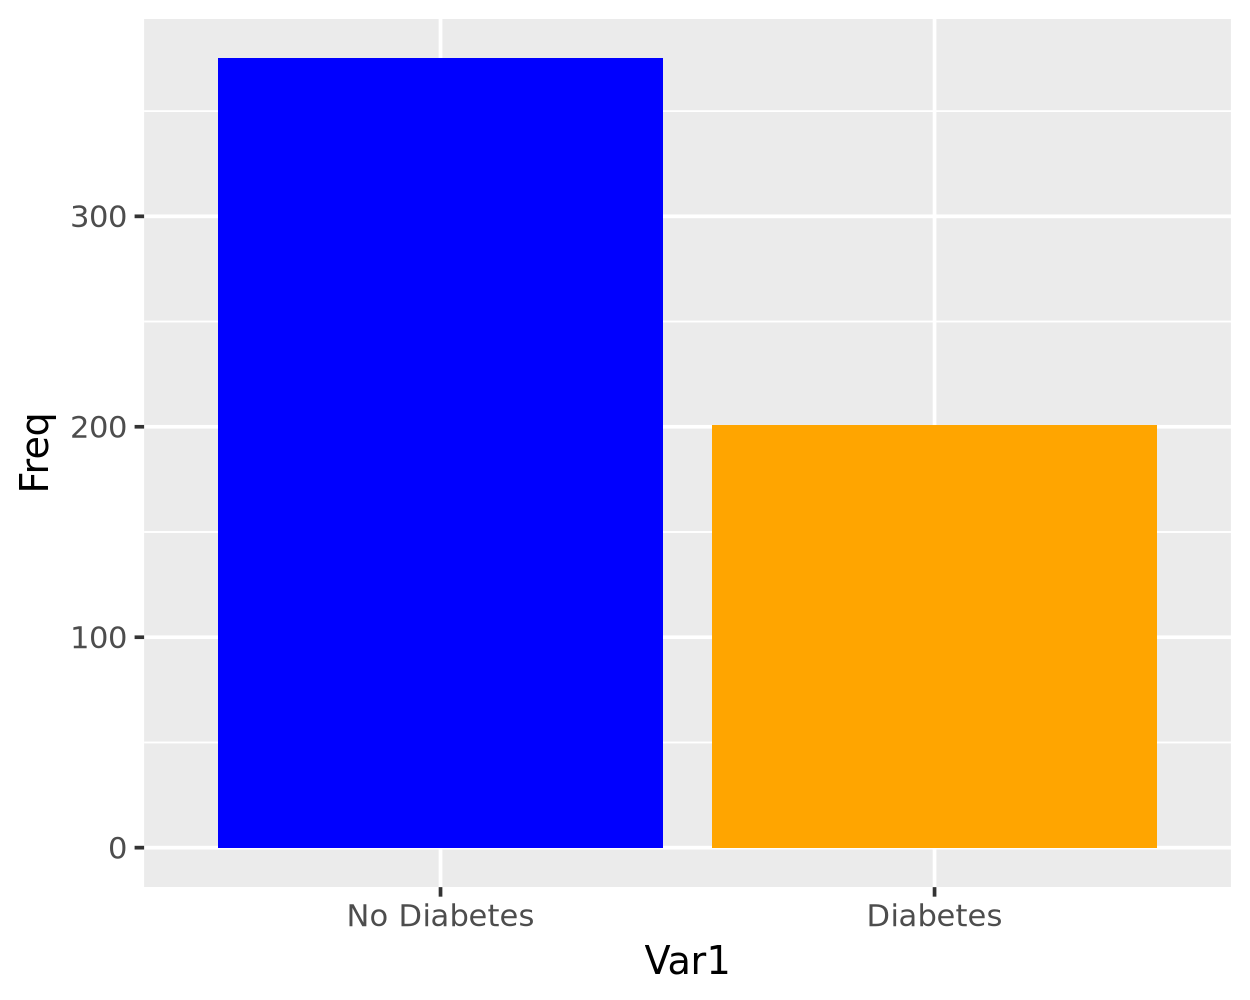

In [28]:
outcome_counts <- table(diabetes_train$Outcome)

ggplot(as.data.frame(outcome_counts), aes(x = Var1, y = Freq)) +
  geom_bar(stat = "identity", fill = c("blue", "orange")) +
  scale_x_discrete(labels = c("No Diabetes", "Diabetes")) 

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

> it is not balanced. We have around 375 counts of no diabetes and 200 counts of diabetes.


Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [29]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

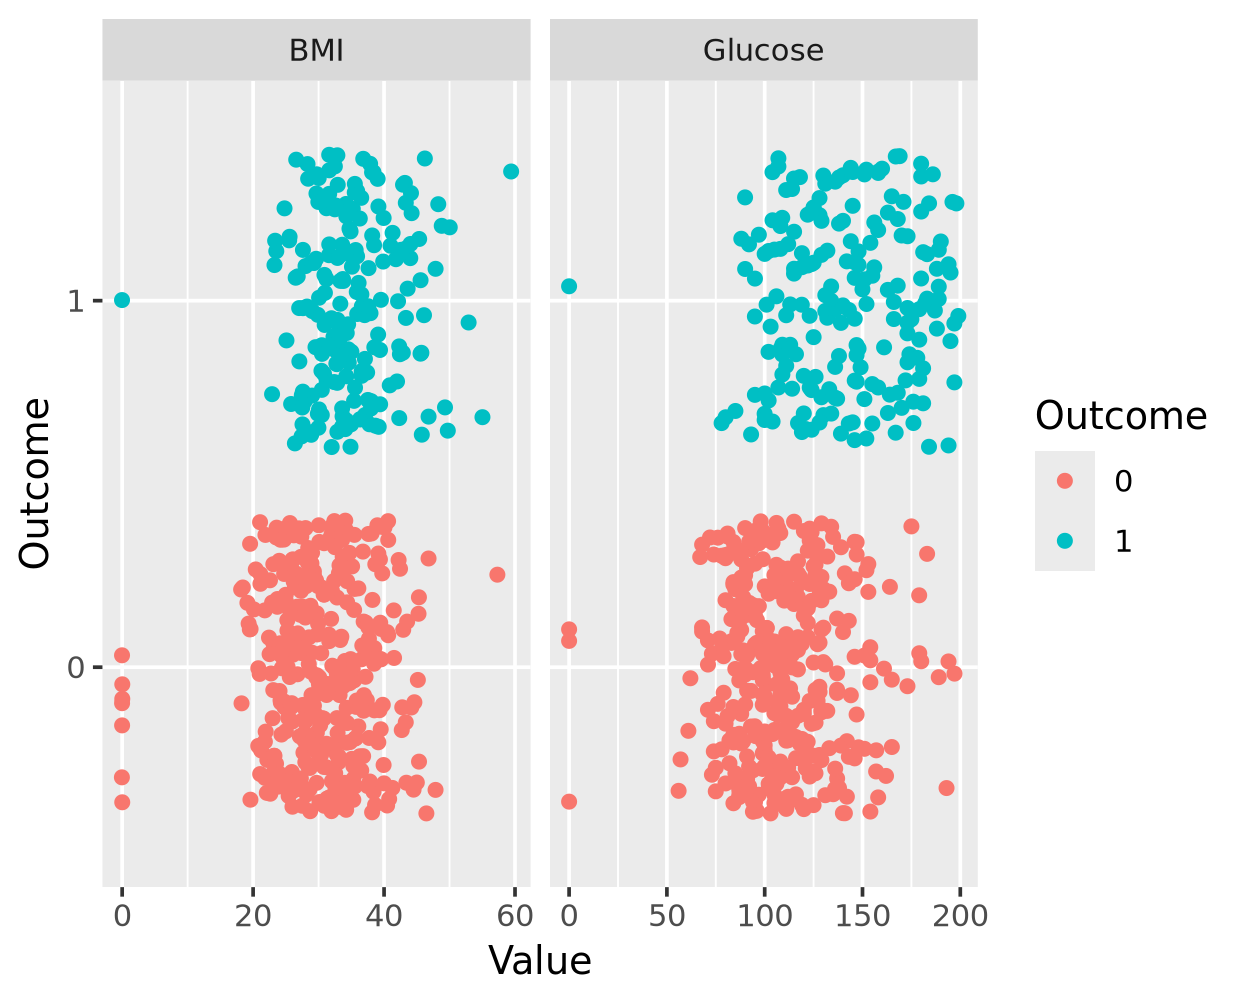

In [30]:
ggplot(plot_df, aes(x = value, y = Outcome)) +
  geom_jitter(aes(color = Outcome)) + 
  facet_wrap(~name, ncol = 2, scales = 'free_x') +                
  labs(x = "Value", y = "Outcome") 

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

> scales freex allows each facet to scale the x axis based on their local min and max. removing it forces both graphs to scale off the global min and max. 

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [31]:
mod_fit <- glm(Outcome ~ BMI + Glucose, data = diabetes_train, family = binomial)
mod_fit


Call:  glm(formula = Outcome ~ BMI + Glucose, family = binomial, data = diabetes_train)

Coefficients:
(Intercept)          BMI      Glucose  
   -7.44514      0.07572      0.03491  

Degrees of Freedom: 575 Total (i.e. Null);  573 Residual
Null Deviance:	    745.1 
Residual Deviance: 580.1 	AIC: 586.1

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [34]:
diabetes_test_wPred = augment(mod_fit, newdata = diabetes_test)
head(diabetes_test_wPred)


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,.fitted
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
0,137,40,35,168,43.1,2.288,33,1,0.6004760
8,125,96,0,0,0.0,0.232,54,1,-3.0817934
10,139,80,0,0,27.1,1.441,57,0,-0.5411771
7,196,90,0,0,39.8,0.451,41,1,2.4101098
10,125,70,26,115,31.1,0.205,41,1,-0.7270051
13,145,82,19,110,22.2,0.245,57,0,-0.7027482


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [42]:
# using other methods since none of this code was correct
library(broom)
library(yardstick)

diabetes_test_wPred$.pred_class <- as.factor(ifelse(diabetes_test_wPred$.fitted > 0.5, 1, 0))

diabetes_test_wPred$Outcome <- as.factor(diabetes_test_wPred$Outcome)
conf_matrix <- conf_mat(diabetes_test_wPred, truth = Outcome, estimate = .pred_class)

conf_matrix

          Truth
Prediction   0   1
         0 119  39
         1   6  28

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

> 67 individuals had diabetes
> 28 were predicted to have diabetes and actually had it
> 